In [52]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

### Data Manipulation

In [51]:
def dataManipulation(cid):
    filePath = r'./dataset/'+str(cid)+'.csv'
    df_test = pd.read_csv(filePath)
    df_test.drop(columns=['CID','CATEGORY','MANUFACTURER_NAME','PRODUCT_NAME'],inplace=True)
    df_test['Grand Total'] = df_test.mean(numeric_only=True, axis=1)
    df_test.ffill(inplace=True)
    nan_percent =100*(df_test.isnull().sum()/len(df_test))>0.4
    nan_value = nan_percent[nan_percent.values==True].index
    df_test.drop(columns= nan_value,inplace=True)
    return df_test
    # df_test.head()

In [70]:
ddd.head()

,COLLECTION_DATE,Target,Walmart,Amazon,Grand Total
0,2021-01-01,23.99,23.99,23.99,23.99
1,2021-01-02,23.99,23.99,23.99,23.99
2,2021-01-03,23.99,23.99,23.99,23.99
3,2021-01-04,23.99,23.99,23.99,23.99
4,2021-01-05,23.99,23.99,23.99,23.99


#### category_index

In [88]:
dfcate = pd.read_csv(r'./dataset/CATEGORY CHANGE.csv')
print(dfcate.head())
dfcate['CATEGORY'].describe()

  COLLECTION_DATE       CATEGORY  ROUND(AVG(MIN_PRICE),2)    RATE
0          1/1/21  Baby Activity                    90.43     NaN
1          1/2/21  Baby Activity                    90.36  -0.08%
2          1/3/21  Baby Activity                    90.26  -0.11%
3          1/4/21  Baby Activity                    90.61   0.39%
4          1/5/21  Baby Activity                    91.14   0.58%


count              4697
unique                7
top       Baby Activity
freq                671
Name: CATEGORY, dtype: object

### Functions

In [1]:
# get platform name, return excepted price strategy each day from Grand Total
def strategy_one(df,colName):
    dataFrame =df.copy(deep=True) # get a copy of origin dataframe, so the following editting won't change origin
    newColName = 'startegy1'+colName #define: column name = strategy+platform 
    dataFrame[newColName] = dataFrame['Grand Total']
    return dataFrame,newColName


In [2]:
# get platform name,dataframe, return excepted price strategy each day from rolling five days
def strategy_two(df,colName):
    dataFrame =df.copy(deep=True)
    newColName = 'startegy2'+colName
    dataFrame[newColName] = dataFrame['Grand Total'].rolling(5,min_periods=1).mean()
    return dataFrame,newColName


In [26]:
# get platform name,dataframe,
# each day extreme price difference
# return expected dataframe, new column name
def strategy_three(df,colName):
    dataFrame =df.copy(deep=True)
    newColName = 'startegy3'+colName
    dataFrame[newColName] = dataFrame[colName]+dataFrame['Amazon']-dataFrame['Target']
    return dataFrame,newColName

In [69]:
def strategy_threepointfive(df,colName):
    dataFrame =df.copy(deep=True)
    newColName = 'startegy3.5'+colName
    # 按目标平台价格变动百分比，变动
    dataFrame[newColName] = dataFrame[colName]*(1+((dataFrame['Amazon']-dataFrame['Amazon'].shift(1))/dataFrame['Amazon'].shift(1)))
    return dataFrame,newColName

In [80]:
# get platform name,dataframe,cost percentage in total price
# current avg product price *0.8 = cost, using cost as model baseline  
# return expected dataframe, new column name
def strategy_four(df,colName,costPercentage =0.8):
    dataFrame =df.copy(deep=True)
    newColName = 'startegy4'+colName
    
    def baseToMean(curPrice, Grand):
        if curPrice*costPercentage >Grand:
            return curPrice*costPercentage
        else:
            return Grand
    dataFrame[newColName] = dataFrame[[colName,'Grand Total']].apply(lambda x:baseToMean(x[colName],x['Grand Total']),axis =1)

    return dataFrame,newColName

In [ ]:
def strategy_five(df,colName,costPercentage =0.8):

In [4]:
def demandRevenue(dataframe, colName):
    df =  dataframe.copy(deep=True)
    df['Demand'+colName]=round(100-0.7*df[colName]+0.5*(df["Grand Total"]-df[colName]))
    df['Revenue'+colName]=df['Demand'+colName]*df[colName]
    return df

### WorkFlow
- require for platform name
- calculate the origin demands and revenue
- calcualte three strategies' demands and revenue
- visualize the outcome

In [56]:
def workflow():
    PlatName = input('plz input platform name')
    df_test = dataManipulation(input('plz input cid'))
    df1 = df_test.copy(deep=True)
    if PlatName not in df1.columns:
        print('please input the existed platform')
        return 0
    df2=demandRevenue(df1,PlatName)
    df2, c3name= strategy_three(df2,PlatName)
    df3= demandRevenue(df2,c3name)
    df3, c2name= strategy_two(df3,PlatName)
    df4 =demandRevenue(df3,c2name)
    df4, c1name= strategy_one(df4,PlatName)
    df5 =demandRevenue(df4,c1name)
    #df5.head()

    ori_revenue = df5['Revenue'+PlatName].sum()
    revenue1=(df5['Revenue'+c1name]).sum()-ori_revenue
    revenue2=(df5['Revenue'+c2name]).sum()-ori_revenue
    revenue3=(df5['Revenue'+c3name]).sum()-ori_revenue
    revenueCompare = {'strategy1':round(revenue1,2),'strategy2':round(revenue2,2),'strategy3':round(revenue3,2)}
    max_value =str(max(revenueCompare,key=revenueCompare.get))+': '+str(max(revenueCompare.values()))
    
    print(revenueCompare)
    print(max_value)
    


In [57]:
'''Input:
        CID
        Demand_index
        Platform
        Strategy'''

result =workflow()

{'strategy1': 450725.87, 'strategy2': 452470.01, 'strategy3': 824141.07}
strategy3: 824141.07


In [58]:
result.head()

,COLLECTION_DATE,Target,Walmart,Amazon,Grand Total,DemandTarget,RevenueTarget,startegy3Target,Demandstartegy3Target,Revenuestartegy3Target,startegy2Target,Demandstartegy2Target,Revenuestartegy2Target,startegy1Target,Demandstartegy1Target,Revenuestartegy1Target
0,2021-01-01,8.99,39.94,23.98,24.303333,101.0,907.99,23.98,83.0,1990.34,24.303333,83.0,2017.176667,24.303333,83.0,2017.176667
1,2021-01-02,8.99,39.94,23.98,24.303333,101.0,907.99,23.98,83.0,1990.34,24.303333,83.0,2017.176667,24.303333,83.0,2017.176667
2,2021-01-03,8.99,39.94,23.97,24.300000,101.0,907.99,23.97,83.0,1989.51,24.302222,83.0,2017.084444,24.300000,83.0,2016.900000
3,2021-01-04,8.99,39.94,23.97,24.300000,101.0,907.99,23.97,83.0,1989.51,24.301667,83.0,2017.038333,24.300000,83.0,2016.900000
4,2021-01-05,8.99,39.94,23.97,24.300000,101.0,907.99,23.97,83.0,1989.51,24.301333,83.0,2017.010667,24.300000,83.0,2016.900000


### Visualization

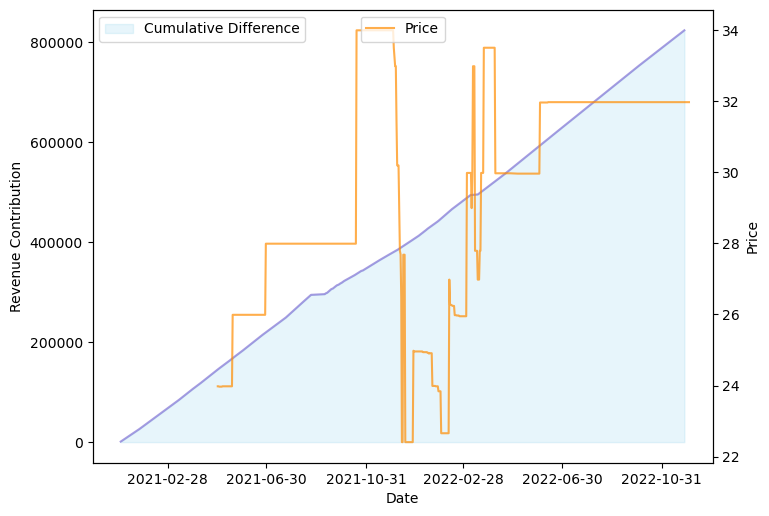

In [66]:
# x：日期 datatype: datetime
# y1：不同策略revenue差值 series
# y2: 该策略的价格 series
def Visualization(x ,y1,y2):   
    # df2 = result
    fig = plt.figure(figsize=(8, 6), dpi=100)
    ax1 = fig.add_subplot(111)
    ax1.fill_between(x, np.cumsum(y1), color="skyblue", alpha=0.2, label="Cumulative Difference")
    ax1.plot(x, np.cumsum(y1), color="Slateblue", alpha=0.6)
    ax1.legend(loc="upper left")
    ax1.set_ylabel('Revenue Contribution')
    ax1.set_xlabel('Date')
    ax2 = ax1.twinx()  # this is the important function
    ax2.plot(x, y2, color='darkorange',alpha=0.7, label="Price")
    ax2.legend(loc="upper center")
    ax2.set_ylabel('Price')
    plt.xticks(pd.date_range('2020-06','2022-12',freq='4m'))
    plt.show()

Visualization(pd.to_datetime(result['COLLECTION_DATE']),result['Revenuestartegy3Target']-result['RevenueTarget'],result['startegy3Target'])

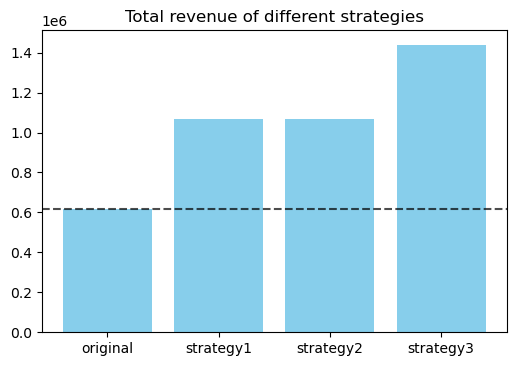

In [82]:
# origin: origin revenue 
# revenueS1..3 : Total revenue for strategy 1 to 3
#                datatype: Dataframe
def visualizeRevenue(origin,revenueS1,revenueS2,revenueS3):
    label=['original', 'strategy1','strategy2','strategy3']
    revenue_value=[origin.sum(),revenueS1.sum(),revenueS2.sum(),revenueS3.sum()]
    fig = plt.figure(figsize=(6, 4), dpi=100)
    plt.bar(label,revenue_value, color='skyblue')
    plt.axhline(origin.sum(),color='black',alpha=0.7,linestyle='--')
    plt.title("Total revenue of different strategies")
visualizeRevenue(result['RevenueTarget'],result['Revenuestartegy1Target'],result['Revenuestartegy2Target'],result['Revenuestartegy3Target'])